# More functions

Here we demonstrate the reading of MD data in LAMMPS format. Unlike the VASP standard, we need to specify the MD settings separately, with a tuple containing the initial temperature, final temperature and MD time-step. This is the same for all other data formats (but please note that the form of this tuple may change with data types as different information is recorded by the trajectory files, details can be found in Docs). 

The octahedral tilting and distortion calculation can be accelerated with the `multi_thread` option, where the frames will be allocated to multiple threads with the help from `joblib`.

Also, multiple times of `dynamics` function can be called on the same initialized `Trajectory` object if you want to change the analysis options. 

------------------------------------------------------------
Loading Trajectory files...
Current sample: LAMMPS_test
Time Span: 19.5 ps
Frame count: 5
Reading every 1 frame(s)
Number of atoms: 20736
Temperature: 200K
 
A-sites are -> MA: 1728


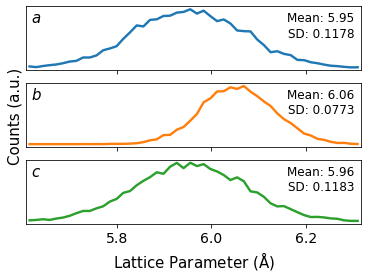

Pseudo-cubic lattice parameter:  [5.9531 6.055  5.956 ]

Computing octahedral tilting and distortion...


Progress: 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


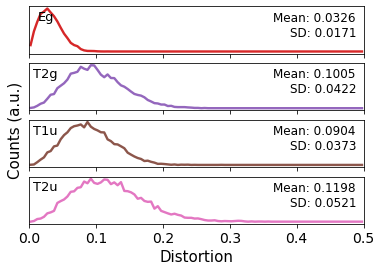

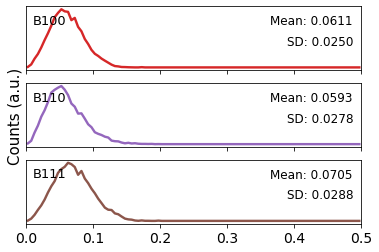

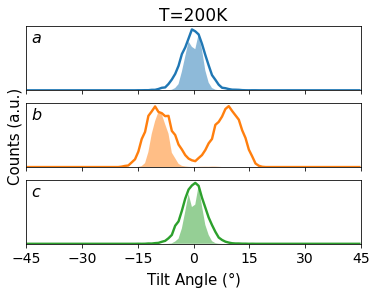

c:\Users\Xia\anaconda3\lib\site-packages\pdyna\analysis.py:4462: RuntimeWarning: overflow encountered in exp
  return np.exp(-k*x)


Tilting spatial correlation length: 
 [[  0.339 169.881   1.121]
 [  1.079 148.366   0.934]
 [  1.14  165.032   0.377]]
dynamic X-site distortion: [0.0326 0.1005 0.0904 0.1198]
dynamic B-site distortion: [0.0611 0.0593 0.0705]
dynamic tilting: [0.   9.25 0.  ]
tilting correlation: [ 0.049 -1.     0.084]
 


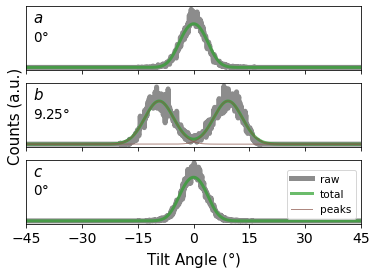

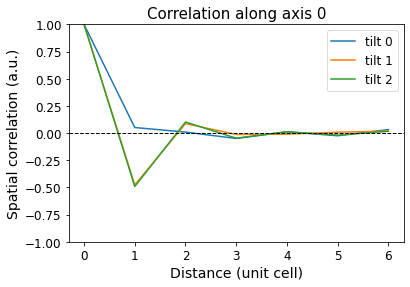

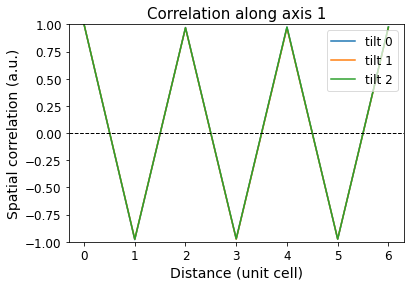

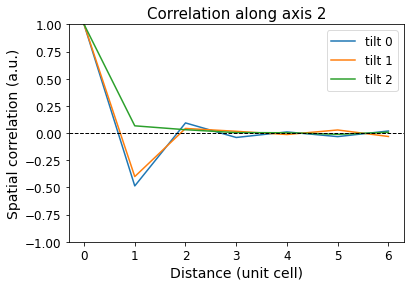

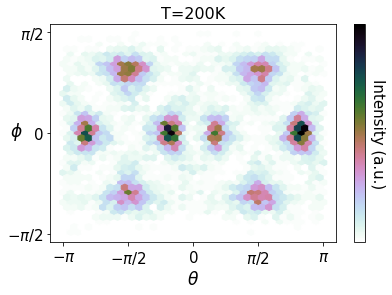

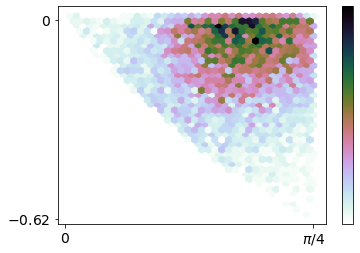

time-averaged structure distortion mode: 
[0.0326 0.101  0.0908 0.1192 0.0604 0.058  0.0698]
 
 
--Elapsed Time
Data Reading:          00:00:01
Structure Resolving:   00:00:02
Lattice Parameter:     00:00:02
Time-averaging:        00:00:06
Tilting & Distortion:  00:00:21
Molecular Orientation: 00:00:24
Total:                 00:00:57
------------------------------------------------------------


In [1]:
from pdyna.core import Trajectory

MDtup = (200, 200, 1)  # tuple containing the MD simulation parameters: (initial T, final T, time step in fs)
traj = Trajectory("lammps", ('lammps_example_short.out', MDtup))

traj.dynamics(
    read_mode=1,            # key parameter, 1: equilibration mode, 2: transient mode
    uniname='LAMMPS_test',  # A unique user-defined name for this trajectory, will be used in printing and figure saving
    allow_equil=0.0,        # take the first x fraction of the trajectory as equilibration, this part will not be computed, 0.0 means no equilibration
    read_every=0,           # read only every n steps, default is 0 which the code will decide an appropriate value according to the system size
    saveFigures=True,       # whether to save produced figures

    # function toggles
    toggle_lat = True,           # switch of lattice parameter calculation
    toggle_tavg = True,          # Switch of time averaged structure. 
    toggle_tilt_distort = True,  # switch of octahedral tilting and distortion calculation
    toggle_MO = True,            # switch of molecular orientation (MO) calculation (for organic A-site)

    # Lattice parameter calculation
    lat_method=2,    # lattice parameter analysis methods, 1: direct lattice cell dimension, 2: pseudo-cubic lattice parameter
    zdir=1,          # specified z-direction in case of lat_method 2, 0: a-axis, 1: b-axis, 2: c-axis

    # time averaged structure
    start_ratio=0.8,       # time-averaging structure ratio, e.g. 0.9 means only averaging the last 10% of trajectory
    tavg_save_dir='.\\',   # directory for saving the time-averaging structures

    # octahedral tilting and distortion
    structure_type=1,         # 1: 3C polytype, 2: other non-perovskite with orthogonal reference enabled, 3: other non-perovskite with initial config as reference
    multi_thread=8,           # enable multi-threading in this calculation
    tilt_corr_NN1=True,       # Enable first NN correlation of tilting, reflecting the Glazer notation. Default is True.
    tilt_corr_spatial=True,   # Enable computing of spatial correlation beyond NN1. Default is False.   
)